In [3]:
import pandas as pd
df = pd.read_csv("D:\\Business analyst internship\\Customer-Churn Prediction.csv")

In [4]:
df

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   Tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [6]:
#Remove duplicates 
df.drop_duplicates(inplace=True)

In [7]:
#Check class balance in the target variable
df['Churn'].value_counts(normalize=True)

Churn
No     0.735093
Yes    0.264907
Name: proportion, dtype: float64

In [8]:
#Final check of data types and shape
print(df.shape)
print(df.dtypes)

(7010, 20)
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [24]:
# Exploratory Data Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

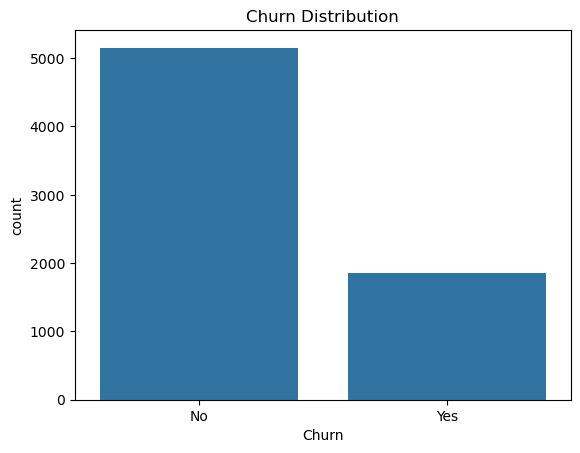

In [10]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

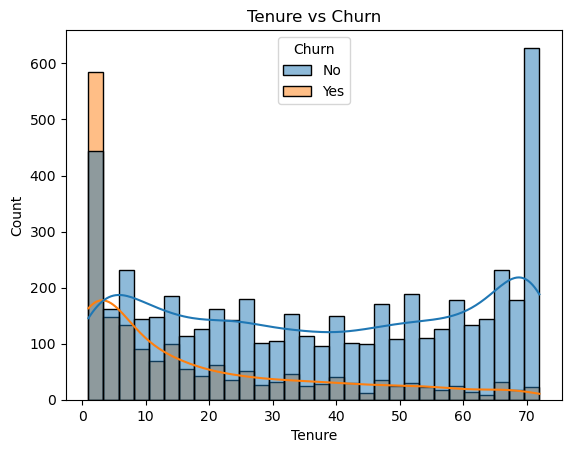

In [12]:
sns.histplot(data=df, x='Tenure', hue='Churn', kde=True, bins=30)
plt.title("Tenure vs Churn")
plt.show()

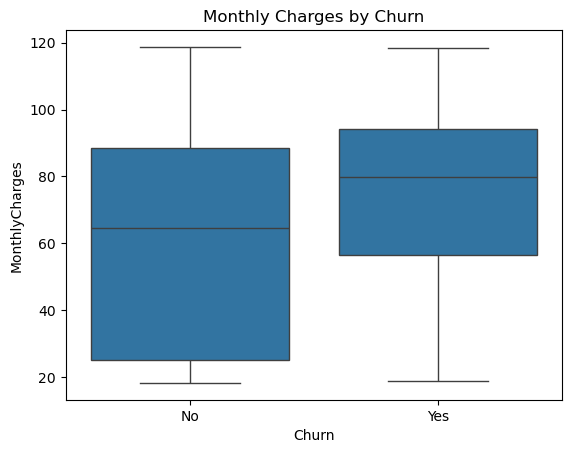

In [13]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn")
plt.show()

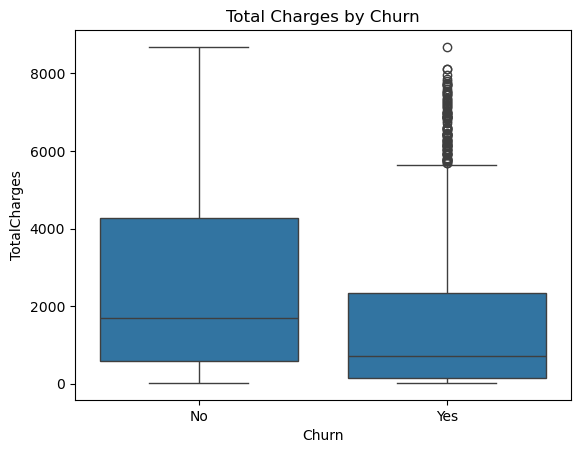

In [14]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title("Total Charges by Churn")
plt.show()

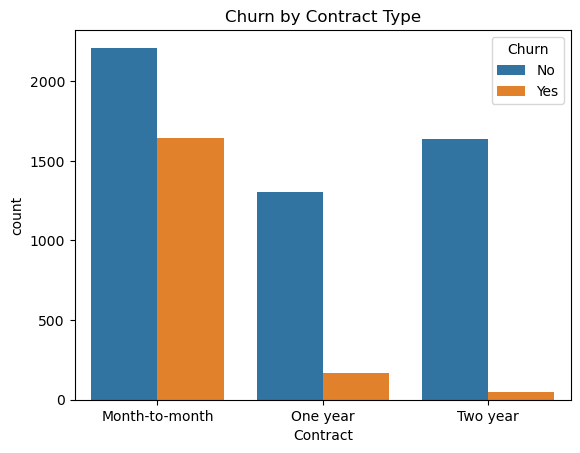

In [15]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()

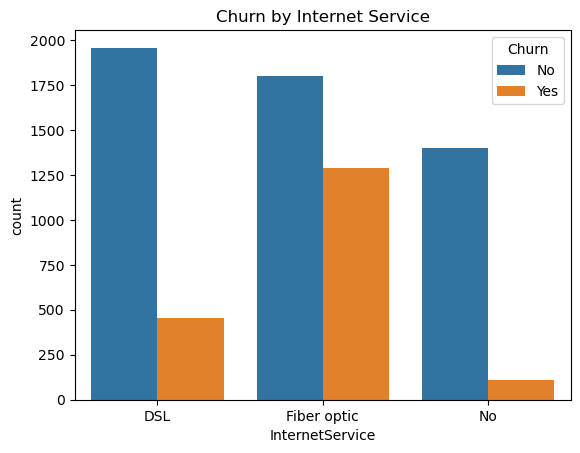

In [16]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn by Internet Service")
plt.show()

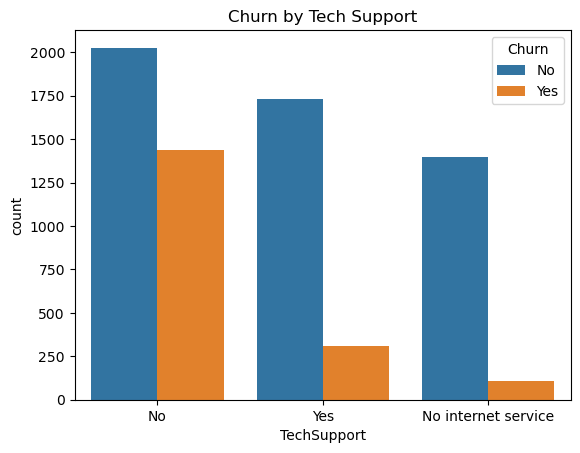

In [17]:
sns.countplot(x='TechSupport', hue='Churn', data=df)
plt.title("Churn by Tech Support")
plt.show()

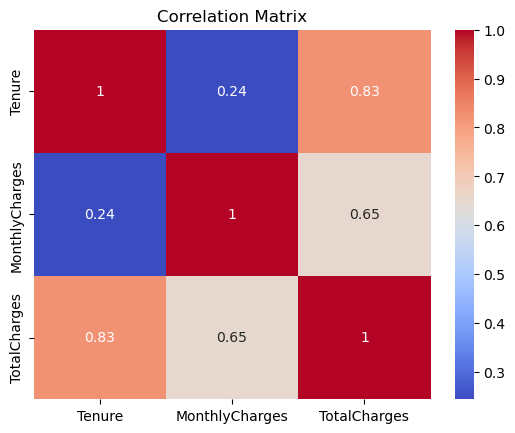

In [19]:
numerical_features = df[['Tenure', 'MonthlyCharges', 'TotalCharges']]
corr = numerical_features.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

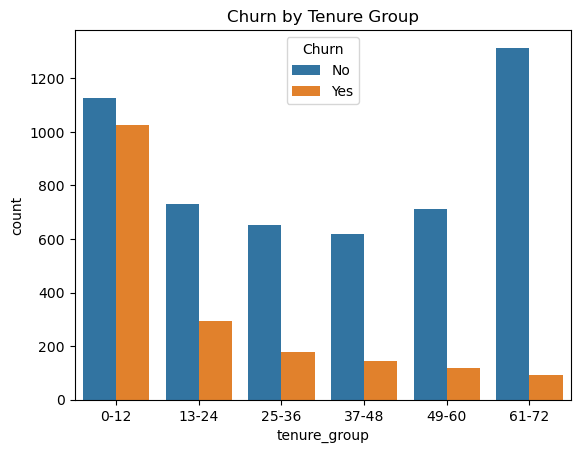

In [23]:
df['tenure_group'] = pd.cut(df['Tenure'], bins=[0, 12, 24, 36, 48, 60, 72],
                            labels=['0-12','13-24','25-36','37-48','49-60','61-72'])

sns.countplot(x='tenure_group', hue='Churn', data=df)
plt.title("Churn by Tenure Group")
plt.show()

In [25]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [26]:
df.drop('tenure_group', axis=1, inplace=True)

In [27]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print(categorical_cols)

['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [28]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [29]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
# If you used scaling
X_final = X_scaled

# If you skipped scaling
# X_final = X

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report


In [35]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)


In [36]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


In [37]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"📊 Evaluation Metrics for {model_name}")
    print("Accuracy:", round(accuracy_score(y_true, y_pred), 4))
    print("Precision:", round(precision_score(y_true, y_pred), 4))
    print("Recall:", round(recall_score(y_true, y_pred), 4))
    print("F1 Score:", round(f1_score(y_true, y_pred), 4))
    print("ROC AUC:", round(roc_auc_score(y_true, y_pred), 4))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("--------------------------------------------------\n")


In [38]:
evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

📊 Evaluation Metrics for Logistic Regression
Accuracy: 0.8074
Precision: 0.6689
Recall: 0.5391
F1 Score: 0.597
ROC AUC: 0.7215

Confusion Matrix:
 [[932  99]
 [171 200]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1031
           1       0.67      0.54      0.60       371

    accuracy                           0.81      1402
   macro avg       0.76      0.72      0.74      1402
weighted avg       0.80      0.81      0.80      1402

--------------------------------------------------

📊 Evaluation Metrics for Random Forest
Accuracy: 0.7903
Precision: 0.639
Recall: 0.4771
F1 Score: 0.5463
ROC AUC: 0.69

Confusion Matrix:
 [[931 100]
 [194 177]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1031
           1       0.64      0.48      0.55       371

    accuracy                           0.79      1402
   macro avg       0.

C:\Users\HP\AppData\Local\Temp\ipykernel_20844\1137389879.py:20: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


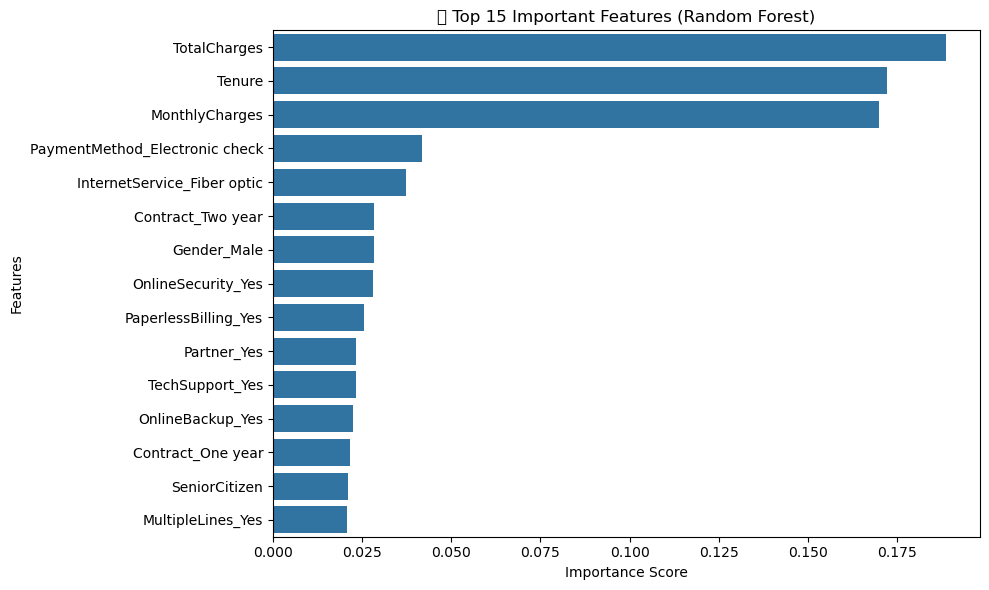

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names
feature_names = X.columns if 'X_scaled' in locals() else df_encoded.drop('Churn', axis=1).columns

# Get feature importances
rf_importances = pd.Series(rf_model.feature_importances_, index=feature_names)

# Top 15 features
top_rf_features = rf_importances.sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_rf_features.values, y=top_rf_features.index)
plt.title("🔍 Top 15 Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_20844\3117867780.py:15: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


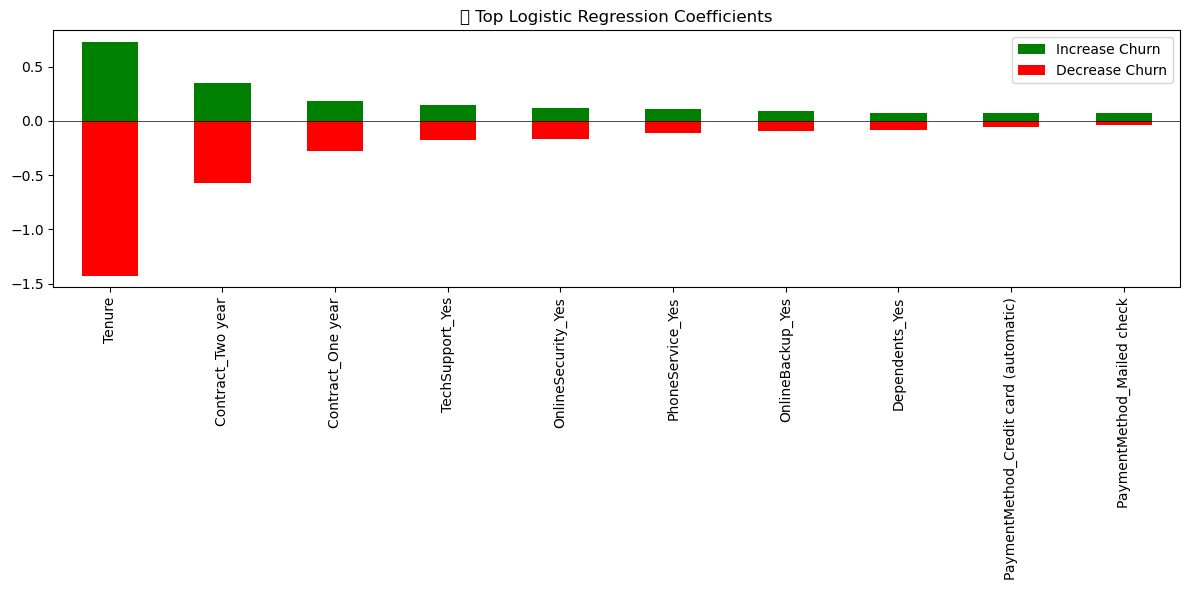

In [40]:
# Get coefficients and map to feature names
log_coeff = pd.Series(log_model.coef_[0], index=feature_names)

# Top positive and negative influences
top_positive = log_coeff.sort_values(ascending=False).head(10)
top_negative = log_coeff.sort_values().head(10)

# Combine and plot
plt.figure(figsize=(12, 6))
top_positive.plot(kind='bar', color='green', label='Increase Churn')
top_negative.plot(kind='bar', color='red', label='Decrease Churn')
plt.title("🔍 Top Logistic Regression Coefficients")
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

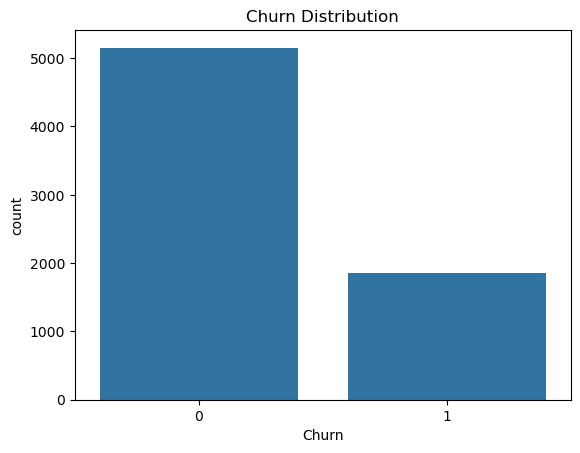

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Churn Count Plot
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

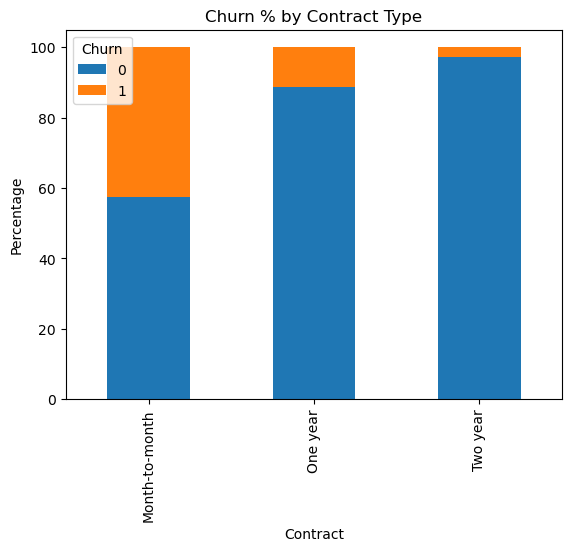

In [45]:
# Churn rate by contract type
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
contract_churn.plot(kind='bar', stacked=True)
plt.title('Churn % by Contract Type')
plt.ylabel('Percentage')
plt.show()
